In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##FIRST VIEW DATA SET

In [ ]:
data1 = pd.read_csv("takehome_users.csv",encoding='latin-1')
data1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
## find any null vallu or missing values

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
data1.isnull()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,False,False,False,False,False,False
11996,False,False,False,False,False,False,False,False,False,True
11997,False,False,False,False,False,False,False,False,False,False
11998,False,False,False,False,False,False,False,False,False,True


## from info we get  4 object so we want to do encoding the 4 columns


In [ ]:
data1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [ ]:
## we rename the object id 

data1.rename(columns={'object_id':'user_id'}, inplace=True)

In [ ]:
data1.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

next we import another csv file 

In [ ]:
data2 = pd.read_csv("takehome_user_engagement.csv",encoding='latin-1')
data2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


from data2 we get one object type column we do encoaing

In [ ]:
data2.time_stamp=pd.to_datetime(data2.time_stamp)

In [ ]:
data=data2.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.head()

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0

In [ ]:

# Sum number of visits for seven-rolling-day periods.
data = data.rolling(window=7, min_periods=1).sum()

In [34]:
# Adding target column 'adopted'
dt.loc[dt['visited'] >= 3, 'adopted_user'] = 1
dt.loc[dt['visited'] < 3, 'adopted_user'] = 0

In [35]:
dt.reset_index(inplace=True) 
dt.head()


,user_id,visited,adopted_user
0,1,1.0,0.0
1,2,3.0,1.0
2,3,2.0,0.0
3,4,3.0,1.0
4,5,4.0,1.0


In [36]:
# Merging two data frames
df = dt.merge(data1, how='inner', on='user_id', sort=True)

In [37]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1.0,0.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,3.0,1.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2.0,0.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,3.0,1.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,4.0,1.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [38]:
df.isnull().sum()

user_id                          0
visited                          0
adopted_user                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
dtype: int64

##here we get null values in invited by user id column fill with 0

In [39]:
df['invited_by_user_id'].fillna(0, inplace=True)
df['invited_by_user_id'] = df['invited_by_user_id'].astype(int)

In [40]:
# Doing some feature engineering
df.creation_time = pd.to_datetime(df.creation_time)
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)
df['active_days'] = df['last_session_creation_time'] - df['creation_time']
df['active_days'] = df['active_days'].dt.days

In [41]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,1.0,0.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,-16183
1,2,3.0,1.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,-16025
2,3,2.0,0.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,-15784
3,4,3.0,1.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,-15847
4,5,4.0,1.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,-15723


In [43]:
df.isnull().sum()

user_id                       0
visited                       0
adopted_user                  0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
active_days                   0
dtype: int64

In [44]:
# Selecting columns for machine learning algorithms
df_new = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
              'org_id', 'invited_by_user_id', 'active_days', 'adopted_user' ]]

In [45]:
df_new.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
0,GUEST_INVITE,1,0,11,10803,-16183,0.0
1,ORG_INVITE,0,0,1,316,-16025,1.0
2,ORG_INVITE,0,0,94,1525,-15784,0.0
3,GUEST_INVITE,0,0,1,5151,-15847,1.0
4,GUEST_INVITE,0,0,193,5240,-15723,1.0


Class 0: 808
Class 1: 8015
Proportion of class 0 is  9.16 %


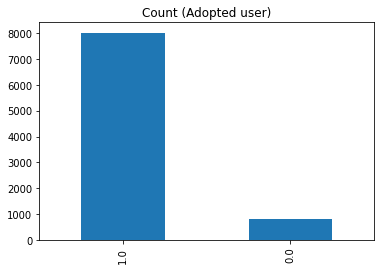

In [46]:
# Huge imbalance between the two target classes.
target_count=df_new.adopted_user.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (Adopted user)')

In [47]:
X=df_new.iloc[:,1:-1]

y=df_new.iloc[:,-1]

In [48]:
import imblearn

## split the data

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [50]:
#we balance the data using the SMOTETOMEK technique:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_balanced, y_balanced = smt.fit_resample(X_train, y_train)

In [51]:
y_train.value_counts()

1.0    5608
0.0     568
Name: adopted_user, dtype: int64

In [52]:
y_balanced.value_counts()

0.0    5106
1.0    5106
Name: adopted_user, dtype: int64

In [54]:
X_balanced.shape



(10212, 5)

In [55]:
y_balanced.shape

(10212,)

In [56]:
# Make dummy variables that we drop in the first place
creation_source_dum = pd.get_dummies(df_new['creation_source'], drop_first=True)
creation_source_dum

,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8818,1,0,0,0
8819,0,0,0,1
8820,0,0,0,0
8821,0,1,0,0


In [58]:
##We need to concatinate the creation_source dummy with the X_balanced dataset to get all features.
X = pd.concat([X_balanced, creation_source_dum], axis=1)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,156,3565,-16091,0.0,0.0,0.0,0.0
1,1,0,8,5507,-16148,1.0,0.0,0.0,0.0
2,1,1,7,0,-16107,1.0,0.0,0.0,0.0
3,1,1,2,0,-16066,0.0,0.0,0.0,0.0
4,0,0,92,4277,-16068,0.0,0.0,0.0,0.0


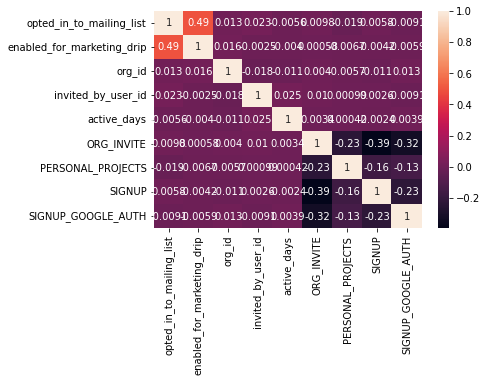

In [59]:
#Plot the correlation between the features
corr = X.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

Now we can see correlation between SIGNUP &ORG_INVITE,SIGNUP_GOOGLE_AUTH & SIGNUP(Negative correlation),SIGNUP_GOOGLE_AUTH & ORG_INVITE(Negative correlation) and opted_in_to_mailing_list & enabled_for_marketing_drip

## modeling

In [66]:
# Use Random Forest to evaluate the importance of features on the classification task.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')




In [67]:
# Train the model on training data
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)


In [68]:
#Feature importance
importances = list(rf.feature_importances_)

In [69]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_balanced, importances)]


In [70]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [71]:

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: invited_by_user_id   Importance: 0.39
Variable: active_days          Importance: 0.3
Variable: org_id               Importance: 0.26
Variable: enabled_for_marketing_drip Importance: 0.03
Variable: opted_in_to_mailing_list Importance: 0.02


[None, None, None, None, None]

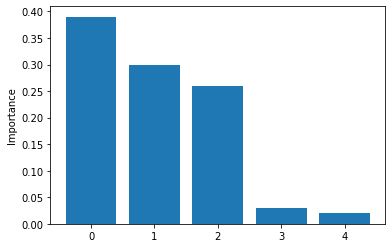

In [72]:
import matplotlib.pyplot as plt
feature_importances.sort(key=lambda x: x[1], reverse=True)
feature_importances
feature = list(zip(*feature_importances))[0]
importance = list(zip(*feature_importances))[1]
x=np.arange(len(feature))
plt.bar(x,importance,align='center')
plt.xticks(x,x) 
plt.ylabel('Importance')
plt.show()

##Plotting important features
From the above graph we can conclude that the important features to predict whether a user is an 'adopted user' ara: 
 
 0.invited_by_user_id

1.Number of active_days

2.organization_id